In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ranksums, mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor

from tabulate import tabulate

from ipynb.fs.full.preprocessing import preprocessing #import preprocessing class from preprocessing.ipynb

## Part 1: Initialize dfs, preprocessing

### 1a. DWT demo

In [5]:
#Part 1: initialize class, read in dataframe
prep_dwt = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/DWT_8702.csv') #initialize class for DWT_8702
prep_dwt.df.head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.462234,-2.390083,-2.496001,-2.567832,-2.714483,-2.853814,-2.587323,-2.815667,-2.529468,-2.487444,...,-2.947384,-2.540375,-2.616557,-2.093166,-2.868000,-2.848592,-2.804433,-2.616103,-2.390560,1
1,-2.303016,-2.243269,-2.377895,-2.322088,-2.544736,-2.664095,-2.746503,-2.766540,-2.491645,-2.554321,...,-2.927361,-2.402814,-2.416895,-2.345415,-2.815763,-2.905354,-2.957433,-2.701947,-2.344442,1
2,-2.378106,-2.286579,-2.506946,-2.477289,-2.450869,-2.848399,-2.664014,-2.799355,-2.469628,-2.653850,...,-2.909338,-2.932407,-3.013070,-2.302342,-2.872999,-2.893005,-2.884964,-2.744103,-2.603805,1
3,-2.411076,-2.357384,-2.538120,-2.373840,-2.467567,-2.738331,-2.708997,-2.620310,-2.355342,-2.769357,...,-2.929341,-3.015539,-3.008299,-2.217575,-2.847411,-2.946254,-2.969480,-2.614736,-2.401006,1
4,-2.382939,-2.423288,-2.519401,-2.333251,-2.608106,-2.718791,-2.697185,-2.802862,-2.443454,-2.765421,...,-2.822273,-2.751273,-2.699928,-2.227029,-2.842104,-2.909700,-2.976055,-2.682061,-2.421083,1


In [6]:
#Part 2: label_df() function demo
dwt = prep_dwt.label_df()  #return full labeled dataframe with slope_1, slope_2, ..., slope_29, state
dwt.head()

,slope_1,slope_2,slope_3,slope_4,slope_5,slope_6,slope_7,slope_8,slope_9,slope_10,...,slope_21,slope_22,slope_23,slope_24,slope_25,slope_26,slope_27,slope_28,slope_29,state
0,-2.462234,-2.390083,-2.496001,-2.567832,-2.714483,-2.853814,-2.587323,-2.815667,-2.529468,-2.487444,...,-2.947384,-2.540375,-2.616557,-2.093166,-2.868000,-2.848592,-2.804433,-2.616103,-2.390560,1
1,-2.303016,-2.243269,-2.377895,-2.322088,-2.544736,-2.664095,-2.746503,-2.766540,-2.491645,-2.554321,...,-2.927361,-2.402814,-2.416895,-2.345415,-2.815763,-2.905354,-2.957433,-2.701947,-2.344442,1
2,-2.378106,-2.286579,-2.506946,-2.477289,-2.450869,-2.848399,-2.664014,-2.799355,-2.469628,-2.653850,...,-2.909338,-2.932407,-3.013070,-2.302342,-2.872999,-2.893005,-2.884964,-2.744103,-2.603805,1
3,-2.411076,-2.357384,-2.538120,-2.373840,-2.467567,-2.738331,-2.708997,-2.620310,-2.355342,-2.769357,...,-2.929341,-3.015539,-3.008299,-2.217575,-2.847411,-2.946254,-2.969480,-2.614736,-2.401006,1
4,-2.382939,-2.423288,-2.519401,-2.333251,-2.608106,-2.718791,-2.697185,-2.802862,-2.443454,-2.765421,...,-2.822273,-2.751273,-2.699928,-2.227029,-2.842104,-2.909700,-2.976055,-2.682061,-2.421083,1


In [7]:
#Part 3: Fisher's
dwt_filtered = prep_dwt.fishers() #windows with highest Fisher's criterion values + state, default 5 features
dwt_filtered.head()

,slope_6,slope_29,slope_4,slope_11,slope_28,state
0,-2.853814,-2.390560,-2.567832,-2.409633,-2.616103,1
1,-2.664095,-2.344442,-2.322088,-2.428556,-2.701947,1
2,-2.848399,-2.603805,-2.477289,-2.089429,-2.744103,1
3,-2.738331,-2.401006,-2.373840,-1.990729,-2.614736,1
4,-2.718791,-2.421083,-2.333251,-1.712213,-2.682061,1


In [8]:
prep_dwt_8 = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/DWT_8702.csv') #DWT_8-7-02
dwt_8 = prep_dwt_8.label_df() #generate dataframe with labels
dwt_topten_8 = prep_dwt_8.fishers(top_n = 10) #10 features

prep_wang_8 = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/Wang_8702.csv') #Wang_8-7-02
wang_8 = prep_wang_8.label_df()
wang_topten_8 = prep_wang_8.fishers(top_n = 10)

prep_jones_8 = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/Jones_8702.csv') #Jones_8-7-02
jones_8 = prep_jones_8.label_df()
jones_topten_8 = prep_jones_8.fishers(top_n = 10)

In [9]:
features_dwt_topten_8 = dwt_topten_8.columns
features_wang_topten_8 = wang_topten_8.columns
features_jones_topten_8 = jones_topten_8.columns

%store features_dwt_topten_8 features_wang_topten_8 features_jones_topten_8

Stored 'features_dwt_topten_8' (Index)
Stored 'features_wang_topten_8' (Index)
Stored 'features_jones_topten_8' (Index)


In [10]:
prep_dwt_4 = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/DWT_4302.csv') #DWT 4-3-02
dwt_4 = prep_dwt_4.label_df() 
dwt_topten_4 = prep_dwt_4.fishers(top_n = 10) 

prep_wang_4 = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/Wang_4302.csv') #Wang 4-3-02
wang_4 = prep_wang_4.label_df()
wang_topten_4 = prep_wang_4.fishers(top_n = 10)

prep_jones_4 = preprocessing(file_path = '/Users/jhbyun/Documents/685-Pr/ovarian-cancer-classification/data/Jones_4302.csv') #Jones 4-3-02
jones_4 = prep_jones_4.label_df()
jones_topten_4 = prep_jones_4.fishers(top_n = 10)

In [11]:
%store prep_dwt_8 dwt_8 dwt_topten_8 prep_wang_8 wang_8 wang_topten_8 prep_jones_8 jones_8 jones_topten_8

%store dwt_4 dwt_topten_4 wang_4 wang_topten_4 jones_4 jones_topten_4

Stored 'prep_dwt_8' (preprocessing)
Stored 'dwt_8' (DataFrame)
Stored 'dwt_topten_8' (DataFrame)
Stored 'prep_wang_8' (preprocessing)
Stored 'wang_8' (DataFrame)
Stored 'wang_topten_8' (DataFrame)
Stored 'prep_jones_8' (preprocessing)
Stored 'jones_8' (DataFrame)
Stored 'jones_topten_8' (DataFrame)
Stored 'dwt_4' (DataFrame)
Stored 'dwt_topten_4' (DataFrame)
Stored 'wang_4' (DataFrame)
Stored 'wang_topten_4' (DataFrame)
Stored 'jones_4' (DataFrame)
Stored 'jones_topten_4' (DataFrame)


## Part 2. EDA

### Correlation Coefficient Matrix

<Axes: >

<Axes: >

<Axes: >

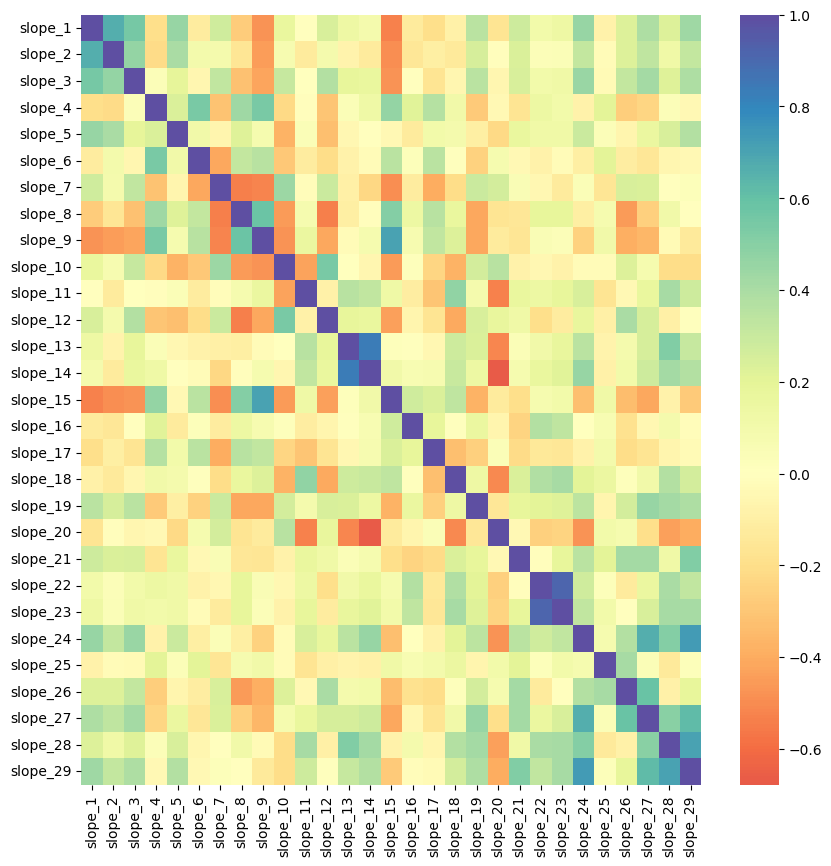

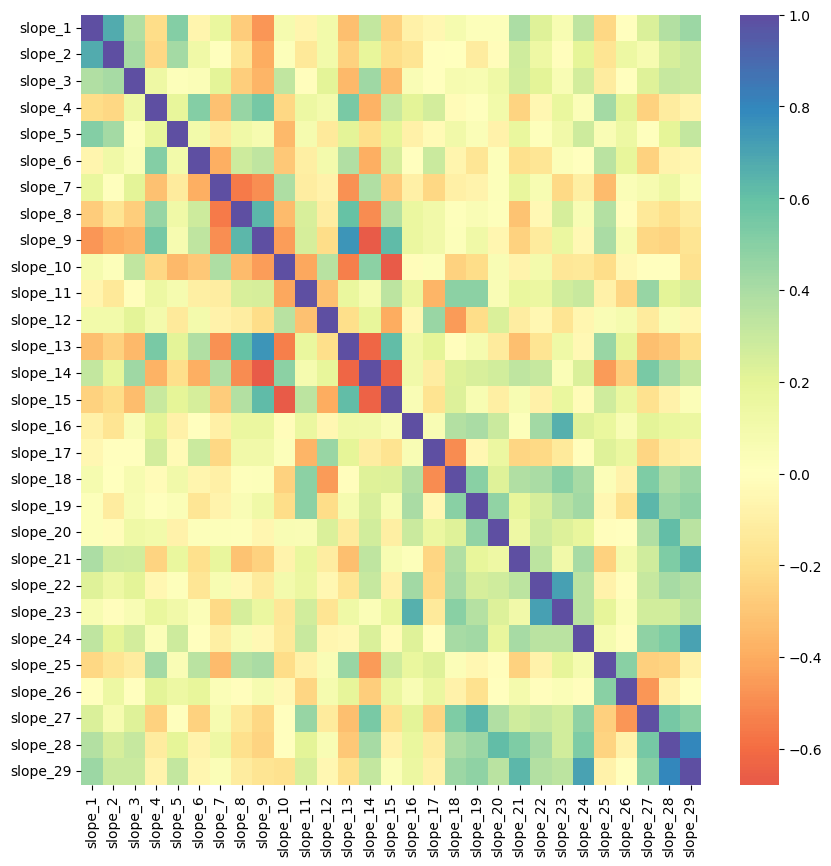

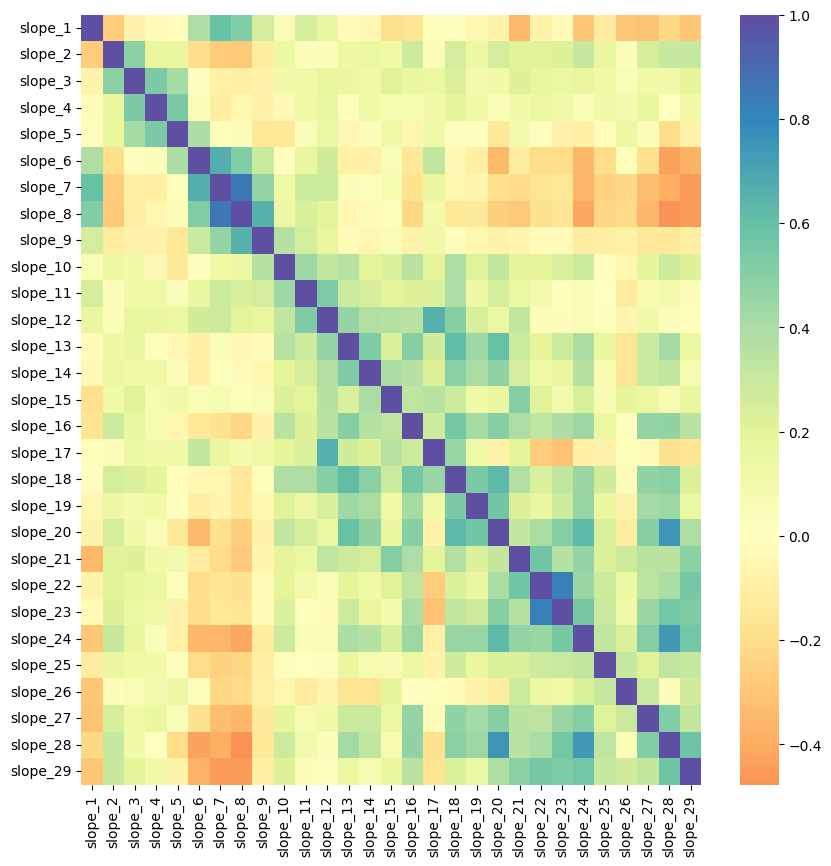

In [12]:
def corr_map(df=dwt_8, file_name='DWT 8-7-02'): #default fx runs dwt8 / DWT_8702

    df = df.loc[:, df.columns != 'state'] #remove state/supervisor column, df is features only
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 10))
    map = sns.heatmap(corr_matrix, annot=False, center=0, cmap="Spectral")#.set_title("Correlation Coefficient Matrix for " + file_name + " Method Slopes")
    
    return map

display(corr_map(df=dwt_8, file_name='DWT 8-7-02')) #run fx with dwt
display(corr_map(df=wang_8, file_name='Wang 8-7-02')) #run fx with wang
display(corr_map(df=jones_8, file_name='Jones 8-7-02')) #run fx with wang

### Probability distribution of selected features

In [11]:
def plot_prdist(df, filtered_df, name):
    cols = list(filtered_df.columns)
    fig, axs = plt.subplots(5, 2, figsize=(15, 18))
    fig.suptitle("Probability Distribution of Top Ten Features by Fisher's Criterion for " + name)

    for i, ax in enumerate(axs.flat): #[:-1]
        sns.histplot(data=df, x=cols[i], hue='state', stat='probability', kde='True', ax=ax)
        list(dwt_filtered.columns)

    #fig.delaxes(axs[1,2]) #delete last subplot

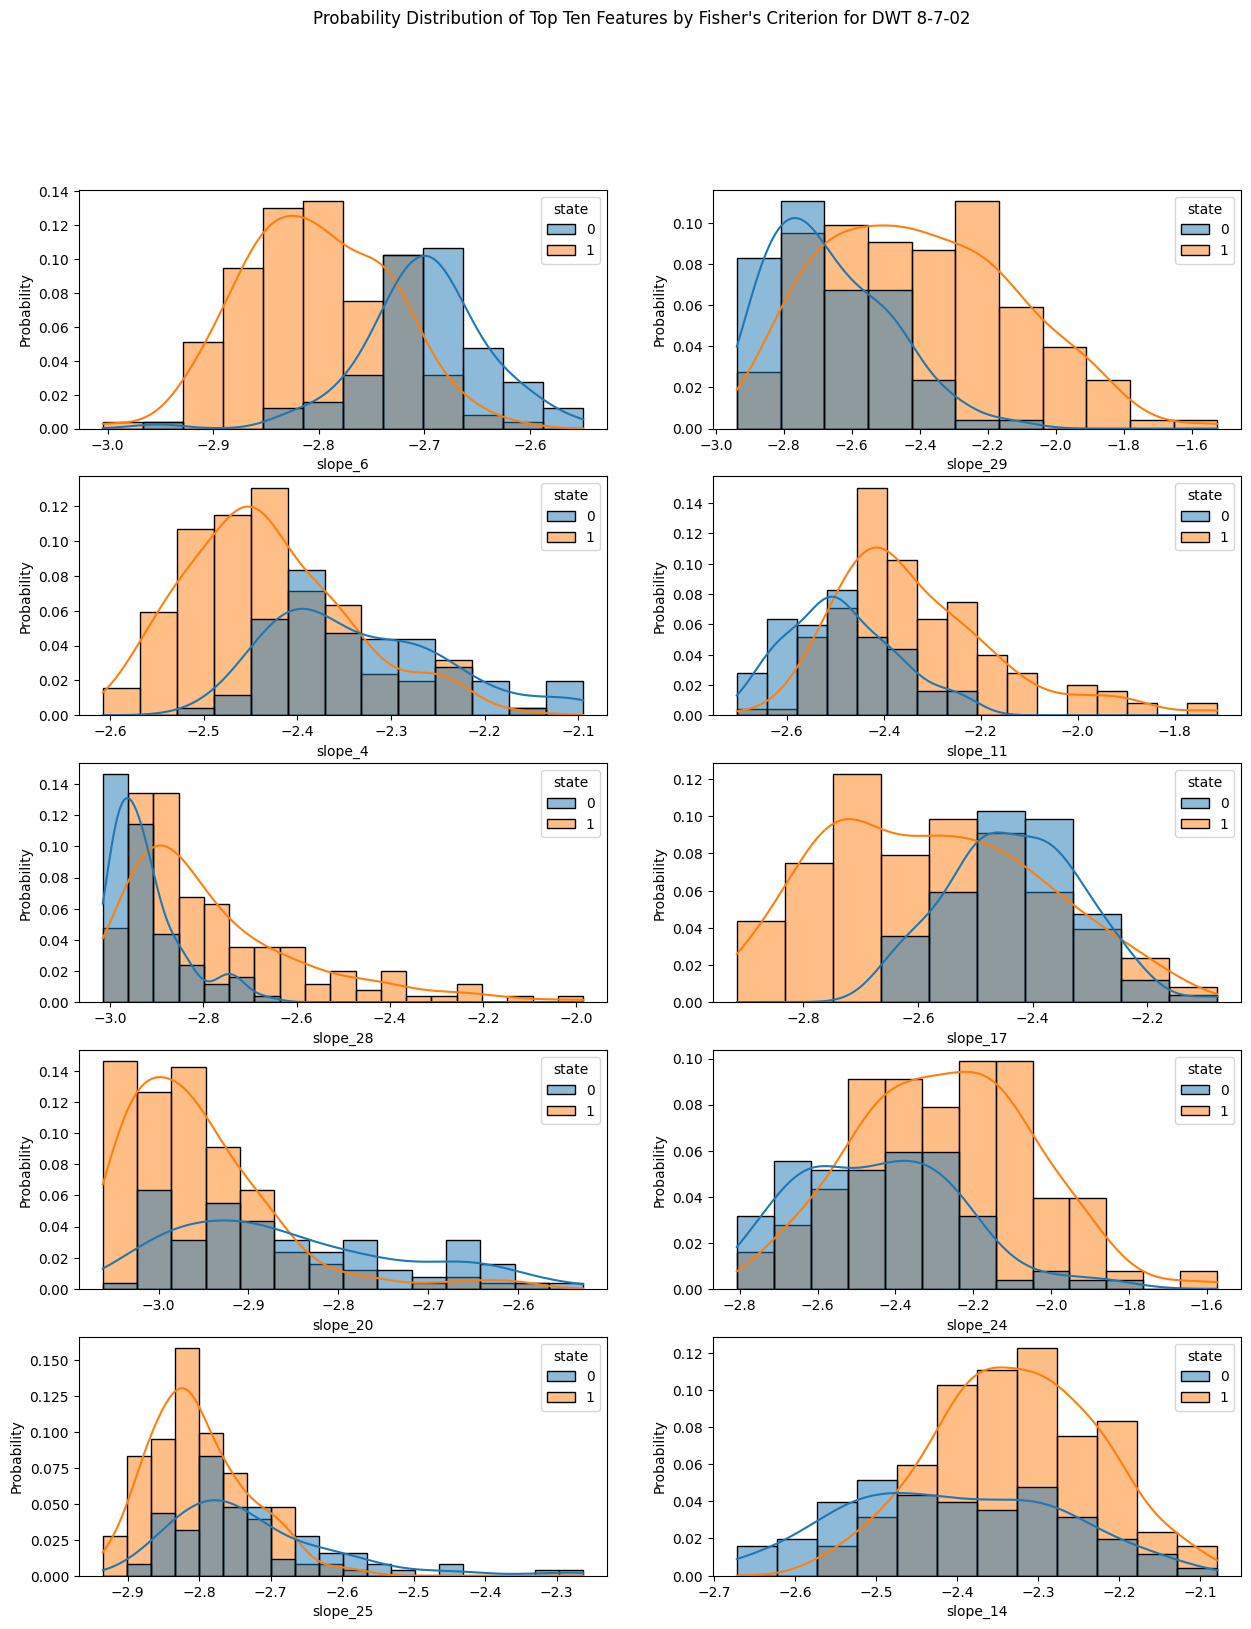

In [12]:
plot_prdist(dwt_8, dwt_topten_8, 'DWT 8-7-02')

### Wilcoxon Rank-Sum Test

Non-parametric version of the two-sample t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

In [13]:
x = dwt_8['slope_6'][dwt_8['state'] == 0] #controls for slope_6 feature
y = dwt_8['slope_6'][dwt_8['state'] == 1] #cases for slope_6 feature

ranksums(x, y) 

RanksumsResult(statistic=9.930102403735122, pvalue=3.07939131215838e-23)

In [14]:
def wilcoxon_table(df, filtered_df, name):
    cols = list(filtered_df.columns)
    vals = []

    for i, col in enumerate(cols[:-1]):
        x = df[col][df['state'] == 0] #controls
        y = df[col][df['state'] == 1] #cases

        res = ranksums(x, y)

        vals.append([col, (res.pvalue)])

    print("Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for " + name + " Method")
    print(tabulate(vals, headers=['Feature', 'p-value']))

In [15]:
wilcoxon_table(dwt_8, dwt_topten_8, 'DWT')

Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for DWT Method
Feature        p-value
---------  -----------
slope_6    3.07939e-23
slope_29   5.38141e-14
slope_4    2.19463e-14
slope_11   6.6972e-14
slope_28   1.48518e-14
slope_17   3.97841e-10
slope_20   1.60339e-11
slope_24   1.81983e-08
slope_25   1.80104e-08
slope_14   3.24838e-06


In [16]:
wilcoxon_table(wang_8, wang_topten_8, 'Wang')

Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for Wang Method
Feature        p-value
---------  -----------
slope_6    1.79317e-22
slope_27   1.03805e-18
slope_29   7.24662e-15
slope_17   1.02813e-12
slope_25   4.88905e-14
slope_21   4.32063e-14
slope_14   1.34993e-12
slope_4    1.35586e-13
slope_26   2.44636e-13
slope_19   3.85767e-12


In [17]:
wilcoxon_table(jones_8, jones_topten_8, 'Jones')

Wilcoxon Rank-Sum Test for Top Five Features by Fisher's Criterion for Jones Method
Feature        p-value
---------  -----------
slope_6    2.02079e-17
slope_28   1.00137e-16
slope_20   2.81717e-14
slope_5    3.84378e-13
slope_24   6.35053e-10
slope_23   3.66537e-09
slope_29   9.51077e-07
slope_22   6.83669e-06
slope_8    1.54883e-06
slope_16   1.13026e-06


## Scratchpad

### Variance Inflation Factors for Multicollinearity Detection

In [10]:
df_names = {'dwt': 'DWT 8-7-02', 
            'wang': 'Wang 8-7-02',
            'jones': 'Jones 8-7-02'
            } 

def vif(dfs = [dwt_8, wang_8, jones_8]): 

    for i, df in enumerate(dfs):
        
        df = df.loc[:, df.columns != 'state'] #remove state/supervisor column, df is features only
        
        vif_data = pd.DataFrame() #initialize dataframe for VIF values
        vif_data["feature_"+str(df_names[list(df_names.keys())[i]])] = df.columns #row for each feature
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

        print(vif_data)

vif() #demo with WPD_Wang_8702 file

   feature_DWT 8-7-02           VIF
0             slope_1   2336.750232
1             slope_2   2005.935714
2             slope_3   3420.935089
3             slope_4   1589.912227
4             slope_5   1378.838219
5             slope_6   2435.855732
6             slope_7   2234.657882
7             slope_8   4863.307851
8             slope_9   3219.558812
9            slope_10   3185.522650
10           slope_11    508.180275
11           slope_12    710.107008
12           slope_13   1307.667173
13           slope_14   3381.933984
14           slope_15   1212.642337
15           slope_16    399.576597
16           slope_17    454.546431
17           slope_18    989.285203
18           slope_19    938.973584
19           slope_20   2861.212647
20           slope_21   2901.686482
21           slope_22   3837.004678
22           slope_23   2565.473701
23           slope_24    361.996919
24           slope_25   1770.975915
25           slope_26  14531.729844
26           slope_27   9732